# Coherence Resonance in a Noise-Driven Excitable System
The code is for the review of,

Arkady S. Pikovsky and Jürgen Kurths, Phys. Rev. Lett. $\bf{78}$, 775.

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
%config InlineBackend.figure_format='retina'

In [116]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [117]:
def solve(h,t,x0,y0,dt,a,D):
    x=np.zeros(len(t))
    y=np.zeros(len(t))
    s=np.sqrt(h)*D
    x[0]=x0
    y[0]=y0
    for n in range(0,len(t)-1):
        u=np.random.normal(0,1)
        x[n+1] = x[n]+(h*(x[n]-(x[n]**3)/3-y[n]))/0.01
        y[n+1] = y[n]+h*(a+x[n])+(u*s)
    return t[::dt],x[::dt],y[::dt]

## Without noise

In [120]:
# for a = 0.8
h=0.0001
t=np.arange(0,100,h)
x0=0
y0=0
dt=50
a=0.8
D=0.0
timec,spxc,spyc=solve(h,t,x0,y0,dt,a,D)

In [125]:
# for a = 0.8
h=0.0001
t=np.arange(0,100,h)
x0=0
y0=0
dt=50
a=1.05
D=0.0
timenc,spxnc,spync=solve(h,t,x0,y0,dt,a,D)

Text(0, 0.5, '$y$')

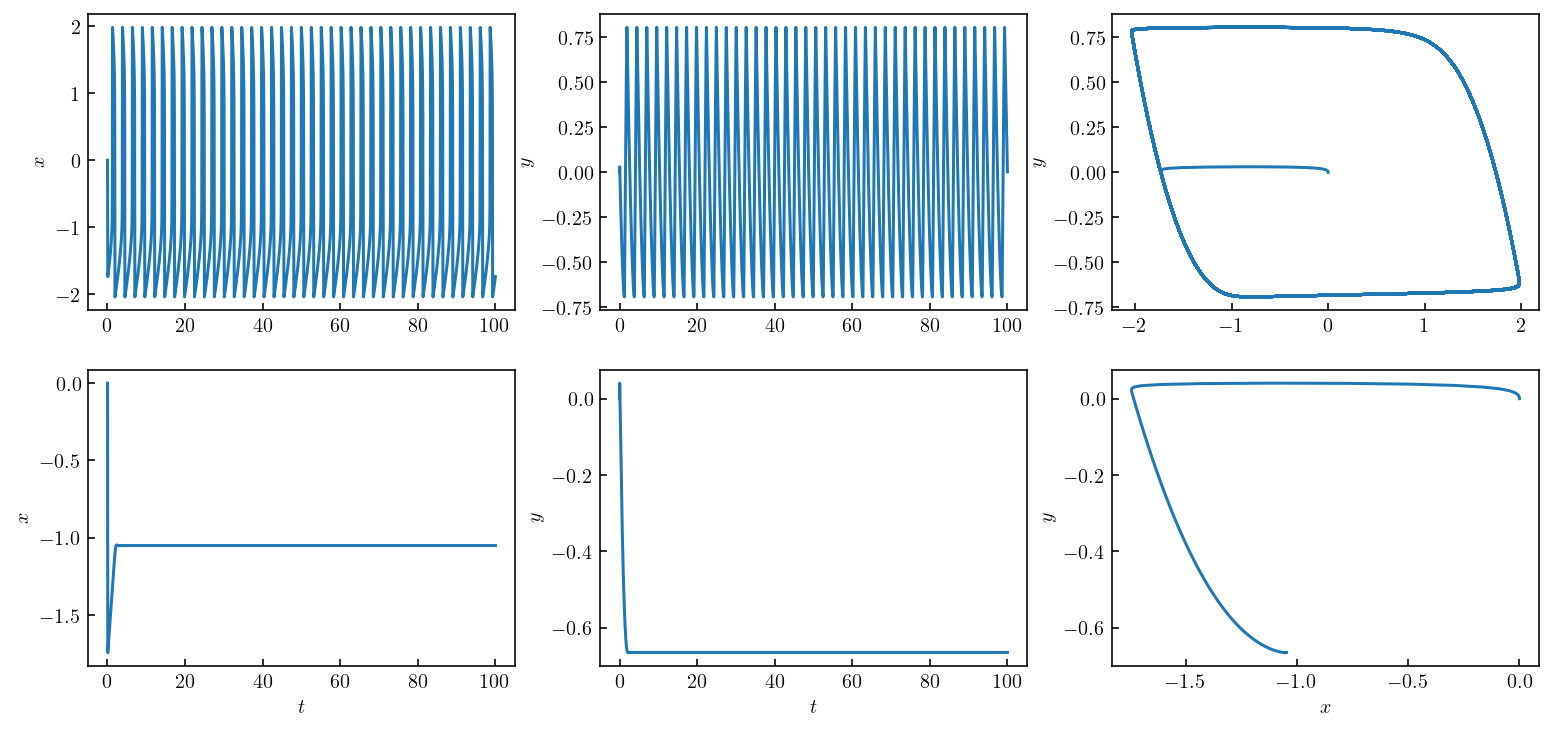

In [147]:
fig,ax=plt.subplots(2,3,figsize=(13,6))
ax[0,0].plot(timec,spxc)
#ax[0,0].set_xlabel('$t$')
ax[0,0].set_ylabel('$x$')
ax[0,1].plot(timec,spyc)
#ax[0,1].set_xlabel('$t$')
ax[0,1].set_ylabel('$y$')
ax[0,2].plot(spxc,spyc)
#ax[0,2].set_xlabel('$x$')
ax[0,2].set_ylabel('$y$')
ax[1,0].plot(timenc,spxnc)
ax[1,0].set_xlabel('$t$')
ax[1,0].set_ylabel('$x$')
ax[1,1].plot(timenc,spync)
ax[1,1].set_xlabel('$t$')
ax[1,1].set_ylabel('$y$')
ax[1,2].plot(spxnc,spync)
ax[1,2].set_xlabel('$x$')
ax[1,2].set_ylabel('$y$')

## With noise

In [88]:
h=0.0001
t=np.arange(0,100,h)
x0=0
y0=0
dt=50
a=1.05
time1,spx1,spy1=solve(h,t,x0,y0,dt,a,0.25)
time2,spx2,spy2=solve(h,t,x0,y0,dt,a,0.07)
time3,spx3,spy3=solve(h,t,x0,y0,dt,a,0.02)

## Phase space for $D=0.07$

Text(0, 0.5, '$y$')

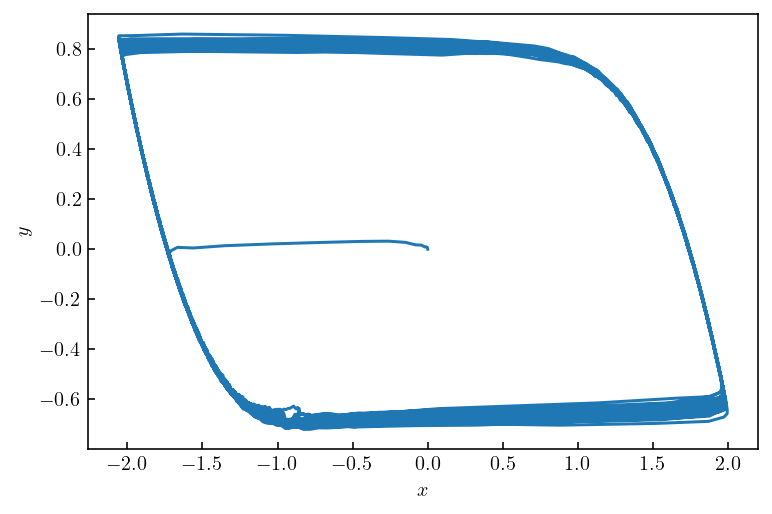

In [150]:
plt.plot(spx2,spy2)
plt.xlabel('$x$')
plt.ylabel('$y$')

## Correlation over 100 paths

In [56]:
def avg(lst):
  zipped=list(zip(*lst))
  av=[np.mean(zipped[i]) for i in range(len(zipped))]
  return av

In [108]:
h=0.0001
t=np.arange(0,100,h)
x0=0
y0=0
dt=20000
a=1.05
all1=[]
all2=[]
all3=[]
for run in range(100):
    _,_,spyc1=solve(h,t,x0,y0,dt,a,0.25)
    _,_,spyc2=solve(h,t,x0,y0,dt,a,0.07)
    _,_,spyc3=solve(h,t,x0,y0,dt,a,0.02)
    ac1=acf(spyc1,nlags=2000,fft=True)
    ac2=acf(spyc2,nlags=2000,fft=True)
    ac3=acf(spyc3,nlags=2000,fft=True)
    all1.append(ac1)
    all2.append(ac2)
    all3.append(ac3)

(-1.1, 1.1)

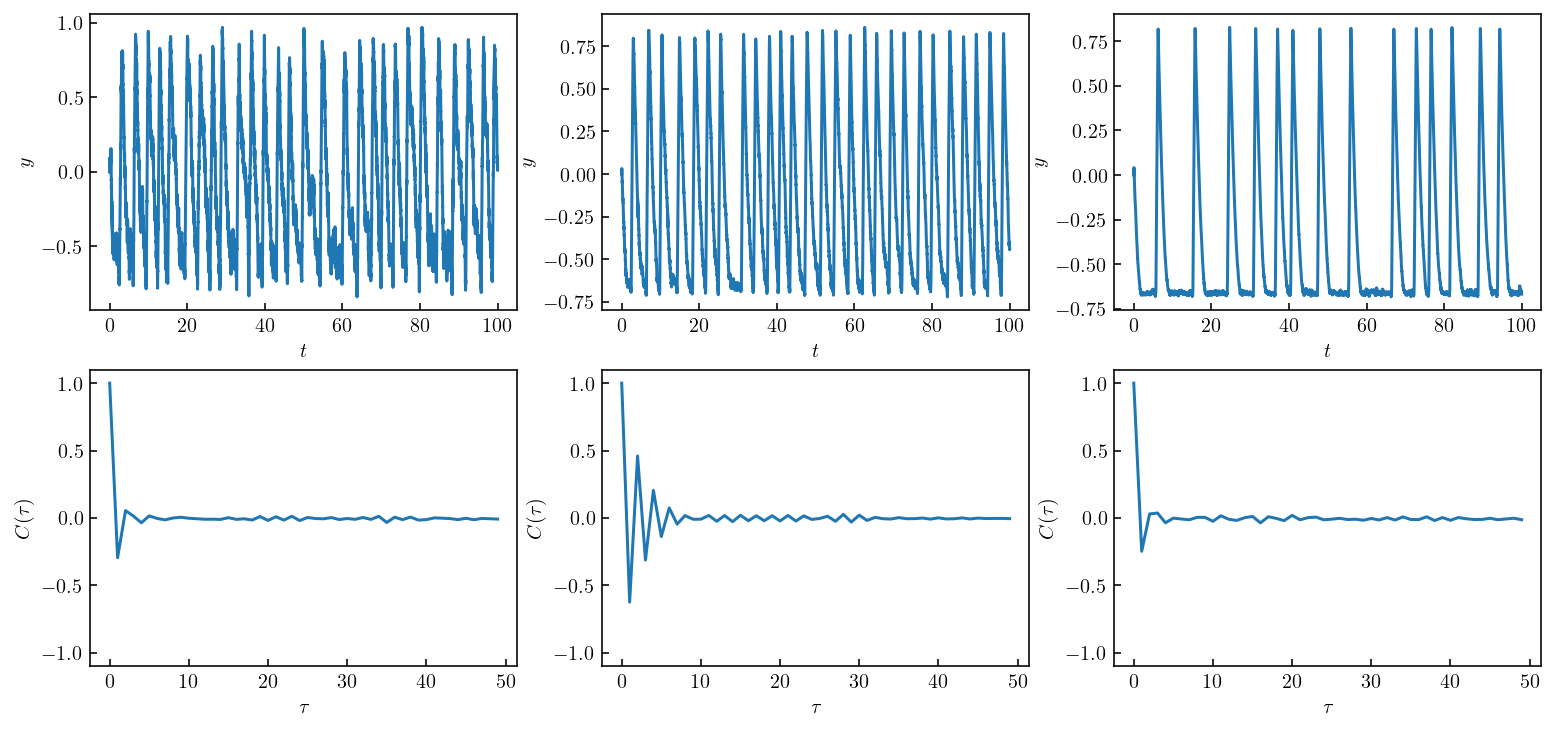

In [148]:
fig,ax=plt.subplots(2,3,figsize=(13,6))
ax[0,0].plot(time1,spy1)
ax[0,0].set_xlabel('$t$')
ax[0,0].set_ylabel('$y$')
ax[0,1].plot(time2,spy2)
ax[0,1].set_xlabel('$t$')
ax[0,1].set_ylabel('$y$')
ax[0,2].plot(time3,spy3)
ax[0,2].set_xlabel('$t$')
ax[0,2].set_ylabel('$y$')
ax[1,0].plot(acf(avg(all1),nlags=250,fft=True))
ax[1,0].set_ylabel(r'$C(\tau)$')
ax[1,0].set_ylim(-1.1,1.1)
ax[1,0].set_xlabel(r'$\tau$')
ax[1,1].plot(acf(avg(all2),nlags=250,fft=True))
ax[1,1].set_ylabel(r'$C(\tau)$')
ax[1,1].set_ylim(-1.1,1.1)
ax[1,1].set_xlabel(r'$\tau$')
ax[1,2].plot(acf(avg(all3),nlags=250,fft=True))
ax[1,2].set_xlabel(r'$\tau$')
ax[1,2].set_ylabel(r'$C(\tau)$')
ax[1,2].set_ylim(-1.1,1.1)

***